#objective
To craete a CNN model and use the model to classify handwritten digits.



#workflow
1. Load the dataset MNIST and examine the structure


*   use any library to load the dataset (include both tensorflow and pytorch modules )
*   take a look at data, inspecting its size,shape and quantity.
* view random samples using either openCV or MATPLOTLIB of the handwritten digits and observe the complexiy of the image 
 2. using Numpy to prepare the dataset for the training


*   Ensure the format or shape of the data is appropriate for input into the model. (One-hot-encoding) https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
*   Ensure the data types are correct and data is normalized
3. Create a CNN with the following specifications
*   Input dimensions 28 * 28 * 1
*   Two Convolution layers (Kernel size 3*3) first with 64 filters, second 32. Use ReLU (Rectified Linear Unit) - activation layer
*   Max Pooling size 2*2
*   Dropout Layer 0.25
*   Dense layer with 128 outputs
*   Add another dropout layer with rate setting of 0.5
*   Add final dropout layer that indicates the class probabilities.
4. Train the CNN on the MNIST dataset prepared in step 2
*   Train for atleast 10 epochs using batch size of 32
5. Plot gragh showing how your training and validation loss and accuracy chached with respect to Epochs completed.
6. Save the model, will be used in part two.
7. Test the models on random samples on the test data.


 







# deliverable
Jupyter Notebook that documents the workflow as we take the MNIST dataset, view samples, convert into right shape/format as required for the deep learning library


# Loading the Handwritten Digit Dataset (MNIST)
"""

In [ ]:
from tensorflow.keras.datasets import mnist


load the dataset(divide into train and test data)

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()


#Display the number of samples in x_train, x_test, y_train, y_test

In [ ]:
print("initial shape or dimensions of x_train",str(x_train.shape)+'\n')
print('Number of samples in training data: '+str(len(x_train)))
print('Number of labels in training data: '+ str(len(y_train)))
print('Number of samples in test data: '+str(len(x_test)))
print('Number of labels in test data: '+str(len(y_test))+ '\n')
print('Dimensions of x_train: '+str(x_train[0].shape))
print('Labels in x_train: '+str(y_train.shape)+'\n')
print('Dimensions of x_test: '+str(x_test[0].shape))
print('Labels in x_test: '+str(y_test.shape)+'\n')

initial shape or dimensions of x_train (60000, 28, 28)

Number of samples in training data: 60000
Number of labels in training data: 60000
Number of samples in test data: 10000
Number of labels in test data: 10000

Dimensions of x_train: (28, 28)
Labels in x_train: (60000,)

Dimensions of x_test: (28, 28)
Labels in x_test: (10000,)



# Take a look at the images in the Dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Plot 6 images in subplots
#set the colormap to grey since our image data is in greyscale

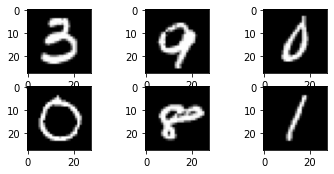

In [ ]:
plt.subplot(331)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))
plt.subplot(332)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))



#Preparing Dataset for Keras

Keras Requires input data as a 4-d shape of (60000,28,28,1). When we initially loaded our data, x_train was (60000, 28,28). We need out label to be one-hot-encoded ().
"""

#Store rows and columns

In [ ]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

#get data in right shape for keras.
#add a forth dimensio to our data (60000,28,28) to (60000,28,28,1)

In [ ]:
x_train=x_train.reshape(x_train.shape[0],img_rows, img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows, img_cols,1)


#Store shape of single image for future use as a variable storing our input shape

In [ ]:
input_shape = (img_rows,img_cols,1)

#Change image type to float

In [ ]:
x_train=x_train.astype('float32')
x_test = x_test.astype('float32')


#Normalize data by changing the range from 0-255 to 0-1

In [ ]:
x_train /=255.0
x_test /=255.0
print('x_train shape: ',x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


#Perform One-hot-encoding of data labels

In [ ]:
from tensorflow.keras.utils import to_categorical

#one hot encode for output

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#count cols in our hot encoded matrix

In [ ]:
print('Number of classes: '+str(y_test.shape[1]))
num_classes = y_test.shape[1]


Number of classes: 10


#Create the CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import SGD

#create the model

In [ ]:
model = Sequential()

#First Convolutional Layer, Filter size 32 which reduces layer size to 26*26*32
#We use ReLU activation and our input shape 28*28*1

In [ ]:
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))

#Second Convolutional layer, Filter size of 64 which reduces our layer size to 24*24*64


In [ ]:
model.add(Conv2D(64, (3,3), activation='relu'))

#Use maxpooling with kernel size of 2*2 reducing size to 12*12*64

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

#Dropout P setting as 0.25 ro reduce overfitting

In [ ]:
model.add(Dropout(0.25))
#Flatten our Tensor object befor input into our dense layer
#A flatten op on a tensor reshapes the tensor to have the shape that is 
#equal to the number of elements in the tensor
#Our CNN goes from 12*12*64 to 9*16*1
model.add(Flatten())
#We use another Dropout layer
model.add(Dropout(0.5))
#Create a fully connected/Dense layer with an output of each class (10)
model.add(Dense(num_classes, activation='softmax'))
#Compileour model, creates an object that stores the model. We set the optimizer
#to use stochastic Gradient Descent (Learning rate of 0.01)
#We set loss function to be categorical_crossentropy as it's suitable for multiclass
#problems. And finally the metrics ( to judge the performance of the model)
#We use accuracy
model.compile(loss='categorical_crossentropy', optimizer=SGD(0.01),metrics=['accuracy'])
#The summary function can be used to display the model layers and parameters
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 9216)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

#Train the CNN


In [ ]:
batch_size = 32
epochs = 10
#Store the results for plotting later
# in our fit function we specify our dataset (X_train, y_train)
#batch_size (typically 16 to 128 --Depending on RAM). NUmber of epochs (10 to 100)
#Validation dataset (X_test, y_test)
#Verbose = 1, setting training to output performance metric every epoch
history = model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs, 
                    verbose=1, 
                    validation_data=(x_test,y_test))
#We obtain accuracy score using the evaluative fn 
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss: ', score[0])
print('Test Accuracy: ', score[1])

Epoch 1/10
 317/1875 [====>.........................] - ETA: 2:02 - loss: 1.2664 - accuracy: 0.6144

KeyboardInterrupt: ignored

#plot loss charts

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
#use the history object to get our saved performance results
history_dict = history.history

#extract the loss and the validation losses
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

#get the number of epochs and create an array up to that number using range()
epochs=range(1, len(loss_values) +1)

#Plot line charts for both validation and loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test loss')
line2 = plt.plot(epochs, loss_values, label='Training loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

#Plot of Accuracy

In [ ]:
#Plotting the accuracy chart
import matplotlib.pyplot as plt
#Use the history object to get our svaed performace results
from keras.callbacks import History 
history_dict=history.history


#extract the loss and the validation losses

In [ ]:
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
#get the number of epochs and create an array up to that number using range()
epochs=range(1, len(acc_values) +1)


#Plot line charts for both validation and loss

In [ ]:
line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()



#saving the model

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/mnist_simple_cnn_10_Epochs.h5')
print('model is saved')
import numpy as np
figure=plt.figure(figsize=(20,20))
for i in range(5):
  figure.add_subplot(1,5,i+1)
  random_idx=np.random.randint(0,len(x_test))
  plt.imshow(x_test[random_idx,:,:,0],cmap='gray')
  plt.axis('off')
  print(np.squeeze(np.argmax(model.predict(x_test[random_idx].reshape(1,28,28,1)), axis=1),axis=0))
  

# Part Two


In [ ]:
#reload the data and model
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

#load the dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()
model = load_model('/content/drive/My Drive/Colab Notebooks/mnist_simple_cnn_10_Epochs.h5')

In [ ]:
#get data into right shape for keras
#have a variable for number of rows and columns
img_rows = x_train[0].shape[0]
img_columns = x_train[0].shape[1]
x_test = x_test.reshape(x_test.shape[0], img_rows, img_columns, 1) #similar to one-hot encoding

#store the shape of a single image
input_shape = (img_rows, img_columns, 1)

#change image type to float32
x_test = x_test.astype('float32')

#normalize the data by changing the range
x_test /= 255.0
y_test = to_categorical(y_test)
print(x_test.shape[0], 'test samples')

10000 test samples


In [ ]:
#displaying the classification report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict_classes(x_test)

print(classification_report(np.argmax(y_test,axis=1),y_pred))
print(confusion_matrix(np.argmax(y_test,axis=1),y_pred))


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg    

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.datasets import mnist

#load the data
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#use numeric python to craete an array that store values of 1 when misclassification ocurs
result=np.absolute(y_test,y_pred)
result_indices=np.nonzero(result>0)

#display the indices of the misclassification
print('indices misclassification data are:\n\n'+ str(result_indices))

indices misclassification data are:

(array([   0,    1,    2, ..., 9997, 9998, 9999]),)


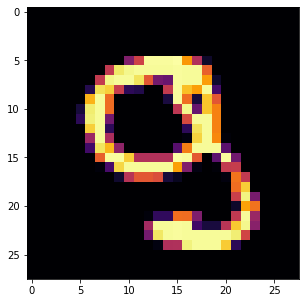

In [ ]:
from tensorflow.keras.models import Model

#extract the output of the top 7 layers-layer outputs
layer_outputs = [layer.output for layer in model.layers[:7]]

#create a model to retun those outputs given the model's input
activation_model =Model(inputs=model.input,outputs=layer_outputs)

#display the test image of the activation model
img_tensor = x_test[151].reshape(1,28,28,1)
figure1 = plt.figure(figsize=(5,5))
plt.imshow(img_tensor[0,:,:,0],cmap='inferno')
plt.axis='off'

In [ ]:
#run the model in predict mode to get the activation layers
#when an image is read, it returns the values of the activation

activations = activation_model.predict(img_tensor)
print("number of activation layers: "+ str(len(activations)))

number of activation layers: 7


In [ ]:
#activation of the first conv layer for the image input
first_layer_activation = activations[0]
print(first_layer_activation.shape)
print(model.summary)

(1, 26, 26, 32)
<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fb3996a1da0>>


### Plot output of 4th conv filter in the 1st conv layer

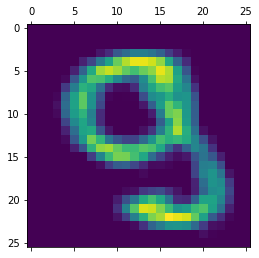

In [ ]:
plt.matshow(first_layer_activation[0,:,:,3],cmap = 'viridis')

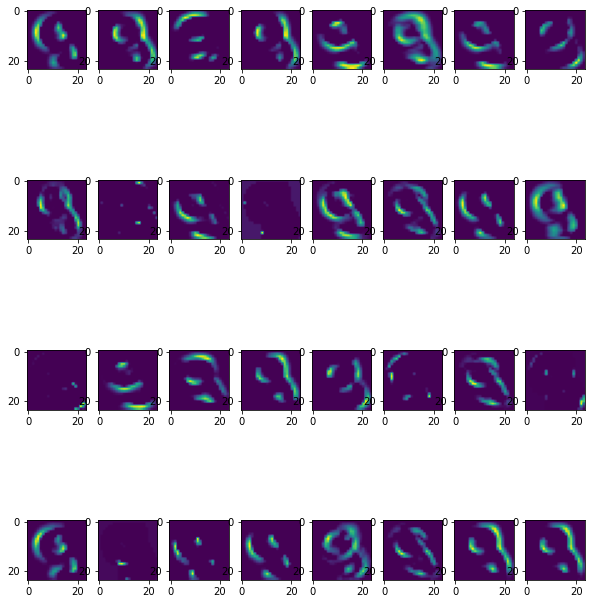

In [ ]:
#create a function to display the actiavrtion of a specific layer the behaviour of how the model makes a decision

def display_activations(activations,col_size,row_size,act_index):
  activation = activations[act_index]
  activation_index = 0
  fig,ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
  for row in range(0,row_size):
    for col in range(0,col_size):
      ax[row][col].imshow(activation[0,:,:,activation_index],cmap = 'viridis')
      activation_index += 1


display_activations(activations,8,4,1)

## Part Two: Assignment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import imageio
import numpy as np
from matplotlib import pyplot as plt

# load the model
from keras.models import load_model
model = load_model("/content/drive/My Drive/Colab Notebooks/mnist_simple_cnn_10_Epochs.h5")

path = "/content/drive/My Drive/Colab Notebooks/Handwritten_Digits_Dataset/"



files = os.listdir(path)

im_files = []


for file in files:
  filename = os.path.basename(file)
  full_name = path + filename
  im_files.append(full_name)




#filenames.sort() # now you have the filenames and can do something with them
print("Number of images in dataset:  " + str(len(im_files)))

for im in im_files:
  im = imageio.imread(im)
  gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])
  # reshape the image
  gray = gray.reshape(1, img_rows, img_cols, 1)

  # normalize image
  gray /= 255


  # predict digit
  prediction = model.predict(gray)
  print(prediction.argmax())



Number of images in dataset:  30
8
9
8
9
3
9
9
9
9
8
9
9
9
8
9
9
9
9
9
9
8
9
9
9
9
9
9
9
8
8


# Part 3: Transfer of Learning

[10:10 AM] Lawrence B Nderu
    

**Workflow**
 
1. Load the CIFAR10 dataset (keras datasets) and train a Deeper CNN with various configulations.
 
2. Train this CNN for 10 Epochs or more using a Batch Size of 32 (batch size does not matter signigicantly as this deepend on the size of the RAM)
 - Examine the performance metrics of the trained CNN. The accuracy after 10 Epochs should be between 60 and 65% on the test data. How can we perform better on this.
3.See what our CNN is capable of by testing the model on some of the Test images used in part 1. How would you compare this it classification performance to a human (assume)
4. The model created could be disappoiting, we then use the Transfer learning to significantly improve it.  (Load the weights of a pre-trained CNN such as VGG16) - to import that model: from tensorflow.keras.applications import vgg16 as vgg.
5. Do not include the top layer when loading,, we are using this model to apply the concept of Transfer Learning - the function *vgg.VGG16(weights='imagenet', include_top=False, input_shape=(48,48,3)) *
6. Extract the last layer from the third block of the VGG16 model. We wil be using the VGG model upto *block3_pool *
 
7. Add the classification layers for the CIFAR10 classed on top of it.
 
8. Freeze all layers in the pretrained VGG16 model since will be reusing them and compile merged model. Iterate through our base_model.layers and set the trainable parameter to be false by using layer.trainable=False
9. Keras data generator loading the image data. 
10. Train the model for at least 5 (10 is the best) Epochs and note the improvement
11. Visualize the filters of the pre-trained VGG16 model - Reload the VGG16 model, Extract the conv layers since we want the filters and the biased values of these. Will inspect the bias and weights using third Conv layer using get_weights().  == a good idea of what filters and biases are.
 
12. Plot the first 6 conv filters- First normalixe the filter values (0-1) --get filters using f=filters[:,:,:,i]. Plot and visualixe it using plt.imshow(f[f:,:,:,j], cmap='gray')
13. Visualixe the features map of the VGG16 by running an input image (Create your own) through the model. -- redefine the model to output right after the first hidden layer using model=Model(input=model.input,outputs=model.layers[1].output.
using the inbuilt keras preprocessing functions load_img and img_to_img along the numpy's expand_dims and keras VGG16 funtion from tensorflow.keras.applictions.vgg16 import preprocess_input 
14. plot these features map for the output of the 5 Convolution Blocks indexed as [2,5,9,13,17]

# Training a model for CIFAR10 Using Deeper CNN

In [ ]:
from  __future__ import print_function
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Activation,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import os

In [ ]:
batch_size = 32
num_classes = 10
epochs = 10

In [ ]:
#load the CIFAR10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
#display image data shape/dim
print('x_train shape',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

x_train shape (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
#format the training data by normalizing and changing datya type
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train /=255.0
x_test /=255.0

In [ ]:
#hot encioding
y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)

In [ ]:
model=Sequential()
#Padding = 'same' results in padding the input such that
#the output has the same length as the original input
model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
 
#model build
model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

#Training 

In [ ]:
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test),shuffle=True,verbose=1)



In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/cifar_simple_cnn_2.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import load_model
model = load_model("/content/drive/My Drive/Colab Notebooks/cifar_simple_cnn_2.h5")

In [ ]:
#evaluate the pperfromance of moidel
score=model.evaluate(x_test,y_test,verbose=1)
print('Test loss:  ',score[0])
print('Test accuracy: ',score[1])

313/313 [==============================] - 11s 35ms/step - loss: 1.0760 - accuracy: 0.6178
Test loss:   1.0760176181793213
Test accuracy:  0.6177999973297119


In [ ]:
#create a function to get class labesl
def getName(label,class_labels):
  return class_labels.get(int(label))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
class_labels={0:'aeroplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

cat	aeroplane	truck	cat	cat	

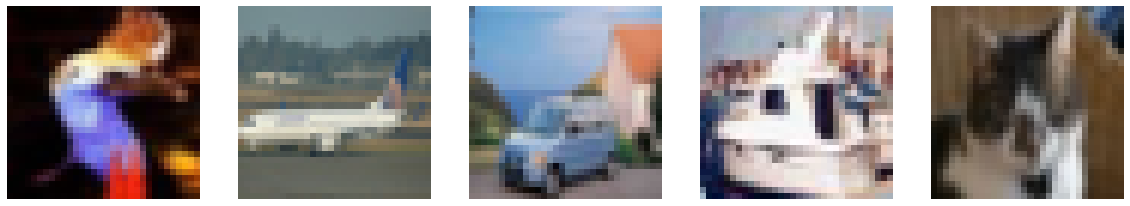

In [ ]:
figure=plt.figure(figsize=(20,20))
for i in range(5):
  figure.add_subplot(1,5,i+1)
  random_idx=np.random.randint(0,len(x_test))
  plt.imshow(x_test[random_idx])
  plt.axis('off')
  label=np.squeeze(np.argmax(model.predict(x_test[random_idx].reshape(1,32,32,3)),axis=1))
  print(getName(label,class_labels), end ='\t')

# Transfer of learning

In [ ]:
#perform the imports
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import vgg16 as vgg16
from tensorflow.keras.layers import Dropout,Flatten,Dense,GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#define some params
BATCH_SIZE=32
EPOCHS=5
NUM_CLASSES=10
LEARNING_RATE=1e-4
MOMENTUM=0.9

#import scipy to resize images
import scipy.misc
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=np.array([cv2.resize(x,(48,48),interpolation=cv2.INTER_AREA) for x in x_train])
x_test=np.array([cv2.resize(x,(48,48),interpolation=cv2.INTER_AREA) for x in x_test])

In [ ]:
#perform hot one ecoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,NUM_CLASSES)
y_test= to_categorical(y_test,NUM_CLASSES)

# Import the pre-trained model VGG16, but without the 'HEAD' layer

In [ ]:
from tensorflow.keras.applications import vgg16 as vgg
base_model=vgg.VGG16(weights='imagenet',include_top=False,input_shape=(48,48,3))

# Extract the last layer from the third block of the vgg16 model

In [ ]:
last=base_model.get_layer('block3_pool').output

In [ ]:
last

<tf.Tensor 'block3_pool/MaxPool_2:0' shape=(None, 6, 6, 256) dtype=float32>

# Add classification layers on top of it

In [ ]:
#x is our model that we're puttting -on top part of our pre-trained model
x=GlobalAveragePooling2D()(last)
x=BatchNormalization()(x)
x=Dense(256, activation='relu')(x)
x=Dense(256, activation='relu')(x)
x=Dropout(0.5)(x)

#we make our top model
number_of_classes=10
top=Dense(number_of_classes,activation='softmax')(x)
#construct
model=model(base_model.input,top)

ValueError: ignored

# Freeze all layers in the model as we'll be reusing them

In [ ]:
#iterate through the base model to freeze the layer so that we don't train them
for layer in base_model_layers:
  layer.trainable=False

NameError: ignored

#

In [ ]:
#compile the merged model
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=1e-4),metrics=['accuracy'])

# Model summary

In [ ]:
model.summary

# Setup to use the Data Generator Function

In [ ]:
train_datagen=ImageDataGenerator(rescale=1.0/255,horizontal_flip=False)

In [ ]:
#use  our Data Generator to get our data
train_datagen.fit(x_train)
train_generator = train_datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)
val_datagen = ImageDataGenerator(rescale = 1.0/255, horizontal_flip=False)val_datagen.fit(x_test)
val_generator = val_datagen.flow(x_test, y_test, batch_size=BATCH_SIZE)

#Training the model

In [ ]:
#We arre ready to start training the mocdel
train_steps_per_epoch=x_train.shape[0]//BATCH_SIZE
val_Steps_per_epoch=x_test.shape[0]//BATCH_SIZE
train_steps_per_epoch=x_train.shape[0] // BATCH_SIZEval_steps_per_epoch=x_test.shape[0] // BATCH_SIZEhistory=model.fit_generator(train_generator,steps_per_epoch=train_steps_per_epoch, validation_data=val_generator,validation_steps=val_steps_per_epoch, epochs=EPOCHS, verbose=1)

With 5 epochs our accuracy is ~ 72% compared to 62% with 10 epochs. Furthermore, transfer learining using more epochs will have better accurcay. Therfore taking advantage of the pretrained nmodel and only training the top layers allows us thye advantage of the pre-trained weights. We need to check "What" exactly those run weights know

# Visualizing the Filters of the Pre-trained VGG16 model

In [ ]:
from tensorflow.keras.applications import vgg16 as vgg16
model=vgg.VGG16(weights='imagenet', include_top=False)
#get theb symbolic outputs of each 'key'
layer_dict=dict([(layer.name, layer) for layer in model.layers])

In [ ]:
#summarize the filter shapes

for layer in model.layers:
  #check for convolutyional layer
  if 'conv' not i layer.mname:
    continue
  #get filter weights
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

In [ ]:
#retrieve the wights form the hidden layer
filters, biases=model.layers[2].get_weights()

In [ ]:
biases

In [ ]:
#shape of the Conv filters
filters.shape

In [ ]:
#shape of biases
biases.shape

In [ ]:
#normalize the 
f_min, f_max=filters.min(), filters.max()
filters=(filters-f_min)/(f_max-f_min)

In [ ]:
filters

In [ ]:
#visulaize the filters

In [ ]:
import matplotlib as plt
#plot the first few filters
n_filters, ix=6,1
for im in range(n_filters):
  #get the filter
  f=filters[:,:,:,i]
  #plot each channel separately
  for j in range(3):
    #sspecify the subplot and turn on axis
    ax=plt.subplot(n_filters,3,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    #plot filter channel
    plt.imshow(f[:,:,j], cmap='gray')
    ix +=1
  #show the figure
  plt.show()

#

In [ ]:
#plot the feature map of the first conv layer for given image
from tensorflow.keras.applicatiuons.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensoprflow.keras.preprocessing.image import load_img
from tensoprflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
import matplotlib as plt
from numpy import 

#load the model
model=VGG16()

In [ ]:
#
model=Model(inputs=model.input, outputs=model.lkayers[1].output)

In [ ]:
#model summary
model.summary()

In [ ]:
#create the model that will return these outputs, given the model input
#we redefine model to output right right after thbe first hidden layer
model=

In [ ]:
#load hte image required shape
img=load_img('sample_1.jpg',target_size=(224,224))

#convgert image to an array
img=img_to_array(img)

#exp[pand the dimensions so that it represents a single sampl
im=expand_dims(img, axis=0)
#prepare the image e.g scale the piuxel values ofr the vgg
img=preprocess_input(img)
#get the featuyre map for the first hidden layer
featurte_maps=model.pre4dict(img)
#plot all the 64 maps in an 8x8 squares
square=8
ix=1
plt.figure(figsize=(12,12))
for _ in range(square):
  for _ in range(square):
    ax=plt.subplot(square, square,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    #plot the filter channel in greyscale
    plt.imshow(featurte_maps[0,:,:,ix-1], cmap='gray')
    ix +=1
  #show the figure
  model.summary()

In [ ]:
for layer in model.layers:  
  # check for convolutional layer  
  if 'conv' not in layer.name:    
    continue  
    #get filter weights  
    filters, biases =layer.get_weights()  
    print(layer.name,filters.shape)

#Part 4: Visualizing Filter Maximizations, Gradient-weighted Class Activation Mapping (Grad-CAM),

### Objective

### Workflow
* 
* The resu;;ting image tensor is a floating point tensor (1,150,150,3) - plot the image pattern and build this entire process into a simple function
* Grad - CAM algorithm -> visualize the areas in an image CNN in decision making
* Bulid a function that will generate the Grad - CAM heat map
* Use exception model to predict the class of the test image
* Overlay the heatmap onto the test image to see which areas in the image were most importantg in achieving the class prediction
*
*** Understand how you can maximize filter maximizations and visualize them

# Maximizing Filter Activations

You add a loss function that maximizes the value of a given filter in a given conv layer, then use stochastic gradient descent to adjust the values of the inpuyt image so as maximize the activation value

In [1]:
from tensorflow.keras.applications import VGG16
from keras import backend as K

In [2]:
model = VGG16(include_top=False, weights='imagenet') #building the vgg16 network

58892288/58889256 [==============================] - 0s 0us/step


In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [6]:
# we explore the 3rd conv block
layer_name='block3_conv1'
#we can use any integer from 0 - 511 since we have 512 filters in that layer
filter_index=0
#build a loss fucntion that maximizes the activation of the nth filters of the layers considered
# use the get_layer funbction
layer_output=model.get_layer(layer_name).output
loss=K.mean(layer_output[:,:,:,filter_index])

In [9]:
import tensorflow
tensorflow.__version__

'2.3.0'

To implement grad descent, you will need
Compute the grad of the input picture with respect to the loss

In [7]:
grads=K.gradients(loss,model.input)[0]

RuntimeError: ignored